Lets filter some data from home-assistant, in this case the outside temperatures recorded by dark-sky 

In [1]:
ls

Filtering home-assistant data.ipynb  darksky_temperature.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('darksky_temperature.csv', index_col=0) 
df.index = pd.to_datetime(df.index)  # Conver index to timestamp
df.head()

,3.4
2018-02-03 20:54:21.303548,
2018-02-03 20:54:21.307471,3.4
2018-02-03 20:54:21.313233,3.4
2018-02-03 20:54:21.316310,3.4
2018-02-03 20:54:21.374422,3.4
2018-02-03 20:54:21.405760,3.4


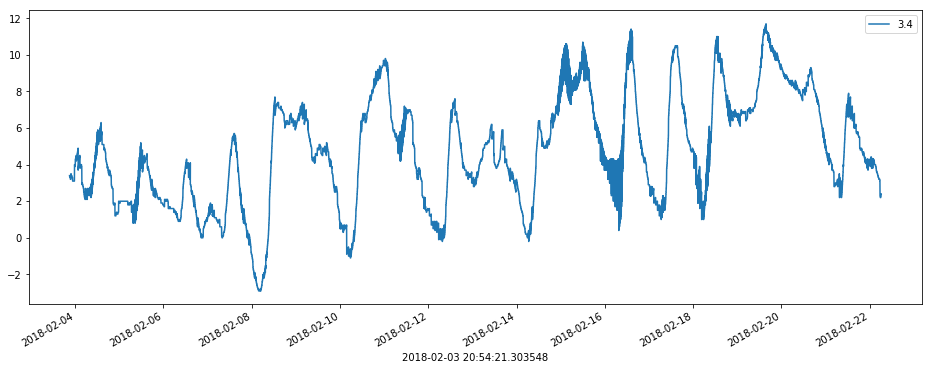

In [4]:
df.plot(figsize=[16, 6]);

Lets look at a noisy few days

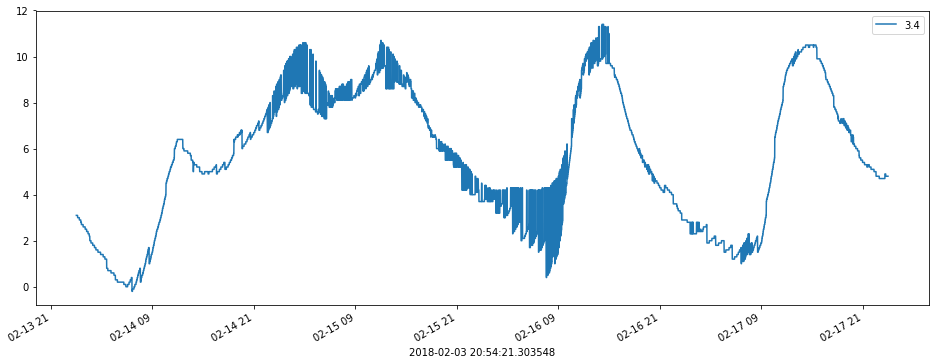

In [5]:
df.loc['2018-2-14':'2018-2-17'].plot(figsize=[16, 6]);